<a href="https://colab.research.google.com/github/taraliu23/Urban-Data-Science/blob/main/GSV_greenspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Data Science

## Topic: 🌲Google Street View (GSV) and Computer Vision 👀

### Quantifying and Mapping Atlanta Midtown's Greenery and Walkability

📝 todo:

📋 how to make this a hackthon

📋 visualize segmentation result (e.g. sidewalk, tree in different colors)

📋 detailed guide on API keys and set env varibales


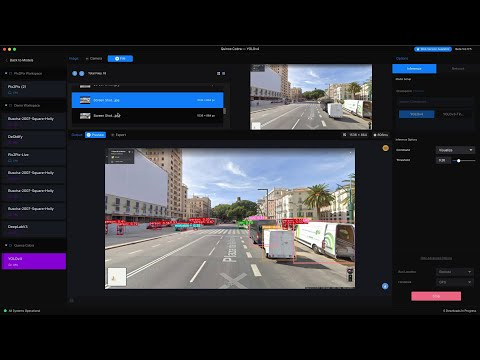

In [1]:
# let's get started!
# <- click on the buttom to run this cell

from IPython.display import YouTubeVideo
from IPython.display import Image

YouTubeVideo('QYbEDOrgPu0',allow_autoplay=True, width=600)

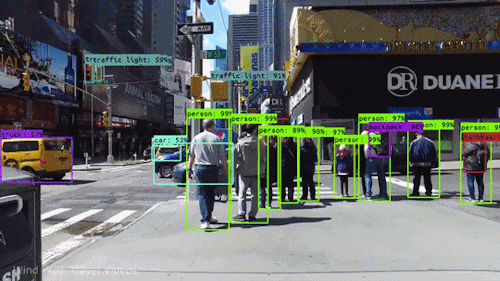

In [4]:
Image('/content/yolo5.gif', width=400)

## Resources:

1. Computer Vision model selection: https://universe.roboflow.com/search?q=class:sidewalk

2. Using deep learning and Google Street View to estimate the demographic makeup of neighborhoods across the United States https://www.pnas.org/doi/10.1073/pnas.1700035114

### Project Overview

This project uses Google Street View (GSV) images and image segementation methods to analyze greenery and walkability in Midtown Atlanta.

The results provide actionable insights for urban green space and sidewalk planning.

### Objectives

Greenery Analysis: Quantify greenery coverage in urban environments.

Walkability Analysis: Estimate walkability scores based on street-level features (e.g., sidewalks).

Data Visualization: Map findings in spatial distribution of greenery and walkability.

### Tools and Technologies
Language: Python

Libraries:
- google-streetview: Download GSV images.
- keras-segmentation: Semantic segmentation for greenery analysis.
- opencv-python: Analyze edges for walkability.
- pandas: Wrangle and orginize data.
- matplotlib: Create scatterplots.
- folium: Visualize spatial data.

Environment: Jupyter Notebook with Google Colab

Other Requirements: Google API Key

### Deliverables
1. Interactive Map: Spatial distribution of greenery and walkability in Midtown Atlanta.
2. Key Visualizations: Scatterplot of greenery vs. walkability. Heatmap of greenery scores.
3. Summary Document: One-page brief summarizing results and insights.


## Step 1: Set Up

1. (Optional) Change runtime to GPU/TPU for faster computing.

    Steps:
    Top right corner "Runtime" -> Change runtime type -> Hardware accelerator -> T4 GPU -> Save



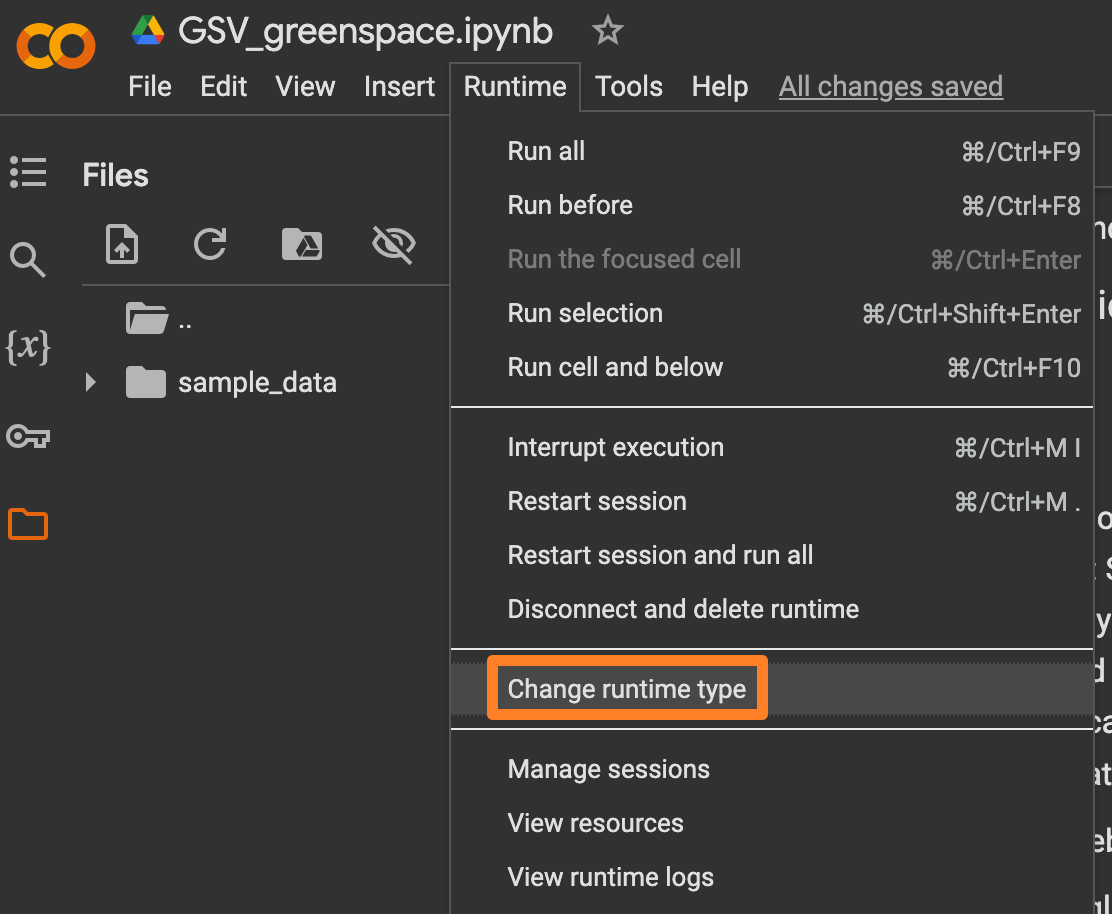

In [8]:
Image('/content/step1_1.jpg', width=400)

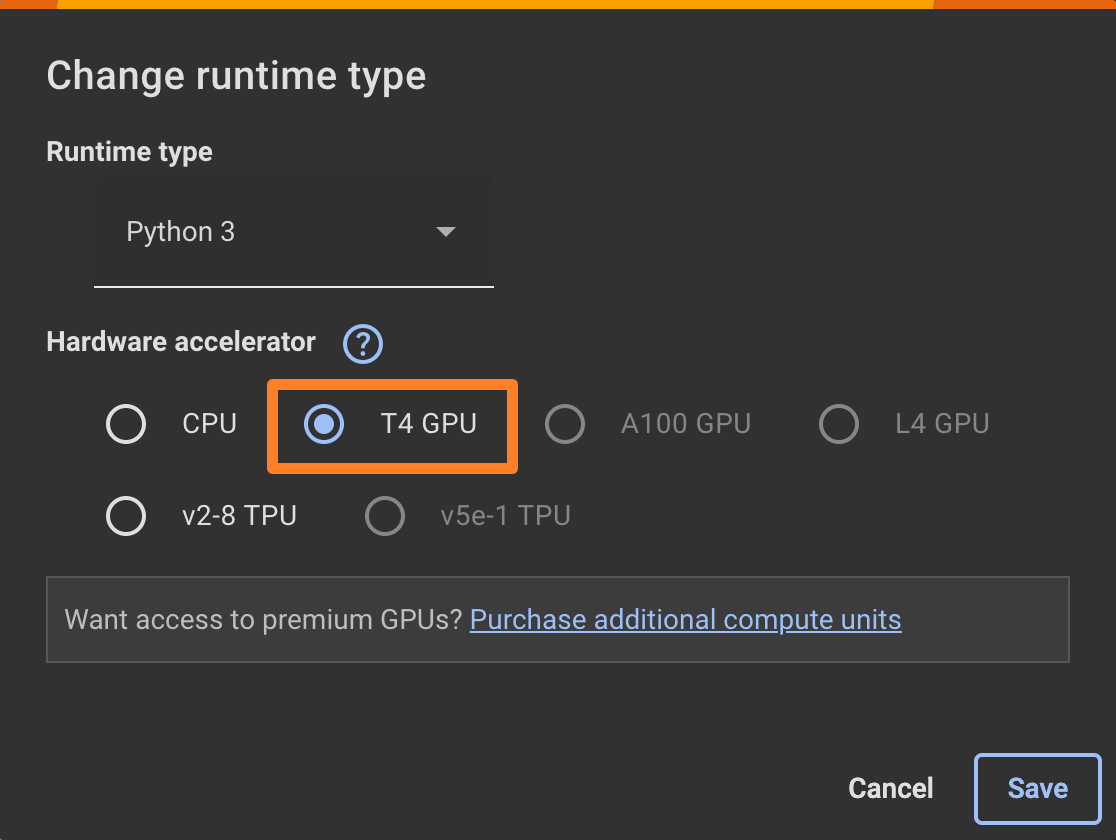

In [9]:
Image('/content/step1_2.jpg', width=400)

In [ ]:
# monitor current hardware
! nvidia-smi

2. Install Required Libraries

In [3]:
! pip --quiet install \
google_streetview \
opencv-python \
keras-segmentation \
pandas \
numpy \
matplotlib \
folium

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.7 MB/s eta 0:00:00


3. Set API key

Steps: Set up a Google Cloud project -> Create an API Key for static street view download

(You don't need to mannually create project/ API Keys, just run cells below)

**Remember: 🤫 Do not share your API Key and credentials to anyone! 🤫**


In [ ]:
# use google cloud sdk to login in google account

! gcloud auth login --no-launch-browser --quiet
# follow the cell output, click on the auth link, copy the verficication code, and paste in the blinking cursor.

In [ ]:
! gcloud projects create "urban-data-science-gsv"

In [ ]:
! gcloud alpha services api-keys create \
    --project "urban-data-science-gsv" \
    --display-name "Street_View_Static_API_Key"\

In [ ]:
! gcloud services api-keys list --project="urban-data-science-gsv"

After creating the API Key, copy and paste it to "Secrets" in the left panel.

🤫 Do not share your API Key and credentials to anyone! 🤫

## Step 2: Download Google Street View Images

In [5]:
import google_streetview.api
from google.colab import userdata
import os
import pandas as pd

In [37]:
# Set up API key
API_KEY = userdata.get('Street_View_Static_API_Key')

# Define coordinates for Midtown Atlanta
locations = [
    "33.7800,-84.3850",
    "33.7810,-84.3860",
    "33.7820,-84.3870",
    "33.701092, -84.418526"

]

os.makedirs("gsv_images", exist_ok=True)

# Download images
for idx, location in enumerate(locations):
    params = [{
        "size": "640x640",
        "location": location,
        "heading": "0",  # Can also test with headings: 0, 90, 180, 270
        "pitch": "0",
        "key": API_KEY
    }]
    results = google_streetview.api.results(params)
    results.download_links(f"gsv_images/image_{idx}_{location}.jpg")

In [19]:
def download_gsv_images(locations_df, api_key):
    """
    Downloads Google Street View images based on coordinates from a dataframe.

    Args:
        locations_df (pd.DataFrame): A Pandas DataFrame with a 'latitude' and 'longitude' column.
        api_key (str): Your Google Street View Static API key.
    """

    os.makedirs("gsv_images", exist_ok=True)

    for index, row in locations_df.iterrows():
        latitude = row['latitude']
        longitude = row['longitude']
        location = f"{latitude},{longitude}"
        params = [{
            "size": "640x640",
            "location": location,
            "heading": "0", # could also be 90, 270, 360
            "pitch": "0",
            "key": api_key
        }]
        try:
            results = google_streetview.api.results(params)
            results.download_links(f"gsv_images/image_{index}")
            print(f"Downloaded image for location: {location}")
        except Exception as e:
            print(f"Error downloading image for {location}: {e}")


# Sample Download
data = {'latitude': [33.7800, 33.7810, 33.7820, 33.701092],
        'longitude': [-84.3850, -84.3860, -84.3870, -84.418526]}
locations_df = pd.DataFrame(data)

download_gsv_images(locations_df, userdata.get('Street_View_Static_API_Key'))

Downloaded image for location: 33.78,-84.385
Downloaded image for location: 33.781,-84.386
Downloaded image for location: 33.782,-84.387
Downloaded image for location: 33.701092,-84.418526


## Step 3: Greenery Analysis with U-Net Semantic Segmentation



#### Object Detection with YOLOv5 in PyTorch

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-1 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/2: 640x640 3 cars, 1 stop sign
image 2/2: 640x640 2 cars, 1 stop sign
Speed: 5.3ms pre-process, 3.7ms inference, 9.1ms NMS per image at shape (2, 3, 640, 640)


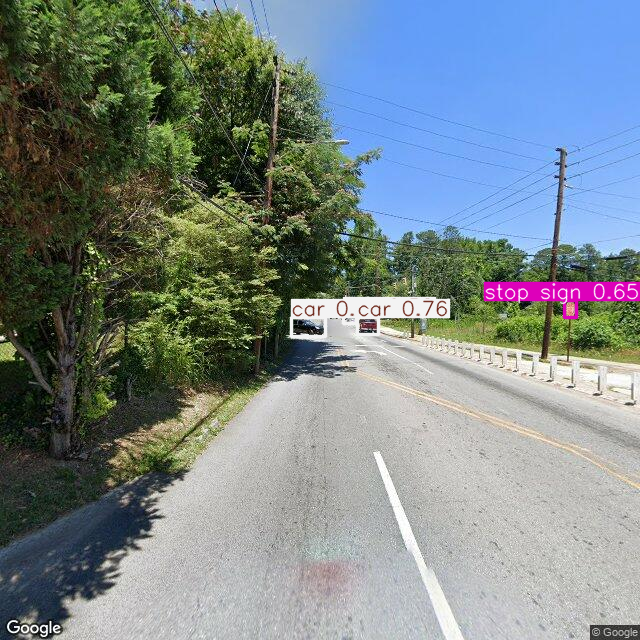

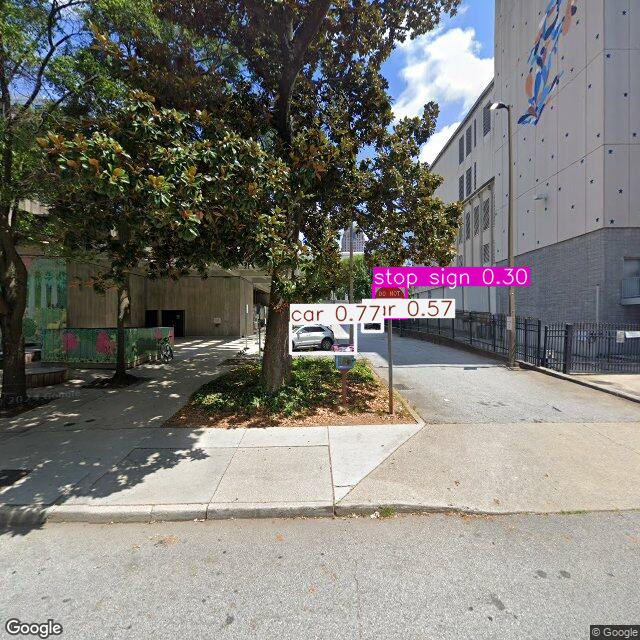

In [51]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

im1 = Image.open("/content/gsv_images/gsv_1.jpg")  # PIL image
im2 = Image.open("/content/gsv_images/gsv_3.jpg")  # PIL image

imgs = [im1, im2]
# Inference
results = model([im1,im2], size=640)

# Results
results.print()
results.show()

In [9]:
from keras_segmentation.models.unet import vgg_unet
import cv2
import numpy as np

In [17]:


model = vgg_unet(n_classes=2, input_height=640, input_width=640)

# Function to calculate greenery score
def calculate_greenery(image_path):
    # Load and resize image
    image = cv2.imread(image_path)

    # Predict segmentation
    segmented = model.predict_segmentation(inp=image)

    greenery_pixels = np.sum(segmented == 1)
    total_pixels = segmented.size
    return greenery_pixels / total_pixels

# # Analyze all images
# image_dir = "gsv_images"
# greenery_scores = []
# for image_file in os.listdir(image_dir):
#     greenery_score = calculate_greenery(os.path.join(image_dir, image_file))
#     greenery_scores.append(greenery_score)

# # Print results
# for idx, score in enumerate(greenery_scores):
#     print(f"Image {idx}: Greenery Score = {score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


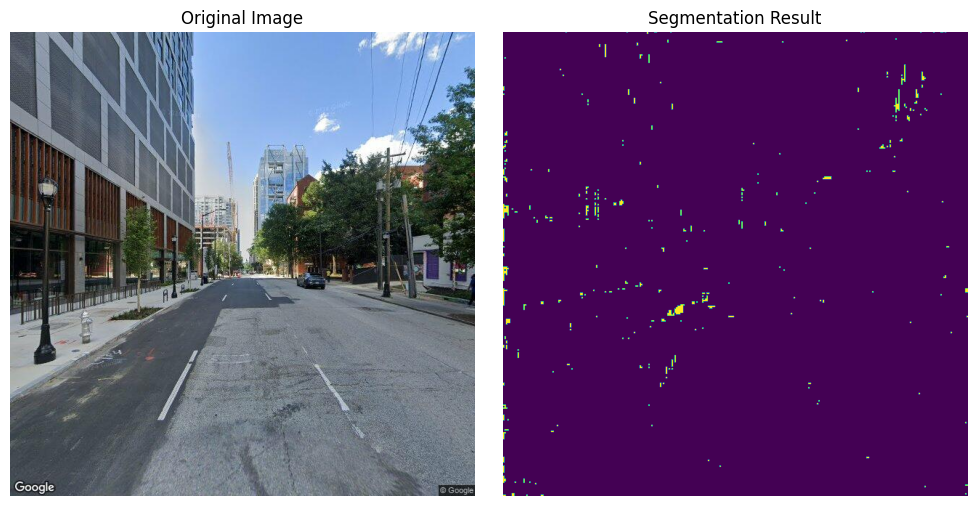

0.007197265625

In [27]:
calculate_greenery('/content/gsv_images/image_2/gsv_0.jpg')

In [46]:

model = YOLO('yolov8n-seg.pt')

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/gsv_images/image_2.jpg/gsv_0.jpg' save=True


Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/gsv_images/image_2.jpg/gsv_0.jpg: 640x640 1 person, 1 car, 1 fire hydrant, 328.8ms
Speed: 17.8ms preprocess, 328.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


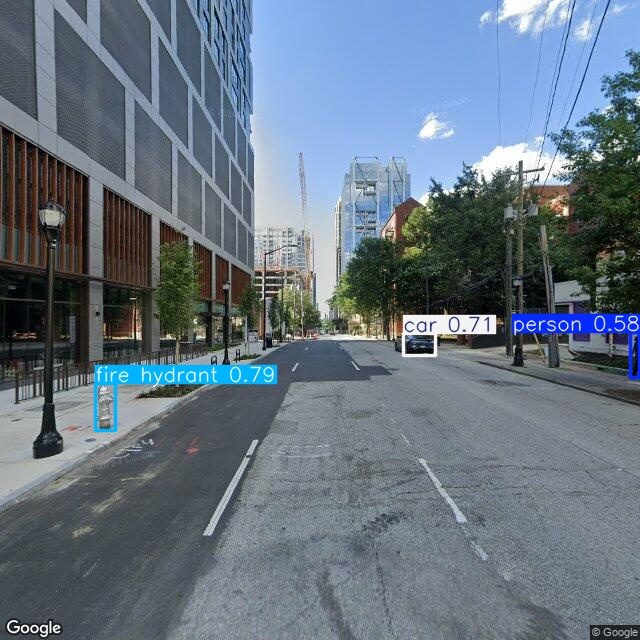

In [48]:
Image('/content/runs/detect/predict2/gsv_0.jpg')

## Step 4: Walkability Analysis

In [ ]:
def detect_edges(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Calculate walkability proxy (edge density)
    edge_density = np.sum(edges > 0) / (image.shape[0] * image.shape[1])
    return edge_density

# # Analyze all images for walkability
# walkability_scores = []
# for image_file in os.listdir(image_dir):
#     walkability_score = detect_edges(os.path.join(image_dir, image_file))
#     walkability_scores.append(walkability_score)

# # Print results
# for idx, score in enumerate(walkability_scores):
#     print(f"Image {idx}: Walkability Score = {score:.2f}")


In [ ]:
detect_edges('/content/gsv_images/gsv_1.jpg')

0.17285888671875

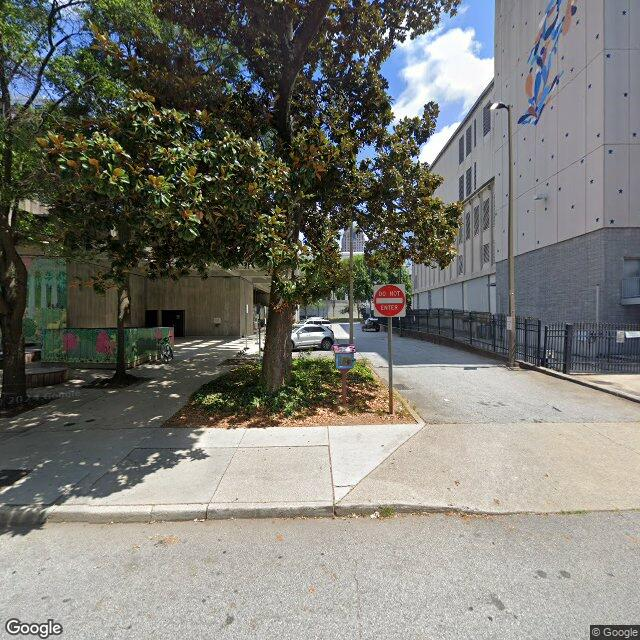

In [ ]:
Image('/content/gsv_images/gsv_1.jpg')

## Step 5: Combine Result and Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for results
data = pd.DataFrame({
    "Location": locations,
    "Greenery Score": greenery_scores,
    "Walkability Score": walkability_scores
})

# Save results to a CSV
data.to_csv("results.csv", index=False)

# Scatterplot: Greenery vs. Walkability
plt.scatter(data["Greenery Score"], data["Walkability Score"], alpha=0.7)
plt.title("Greenery vs. Walkability")
plt.xlabel("Greenery Score")
plt.ylabel("Walkability Score")
plt.grid()
plt.show()

## Step 6: Map spatial distribution of Greenery and Walkability


## Crash Course: Deep Learning, Computer Vision, and their applications in urban data science



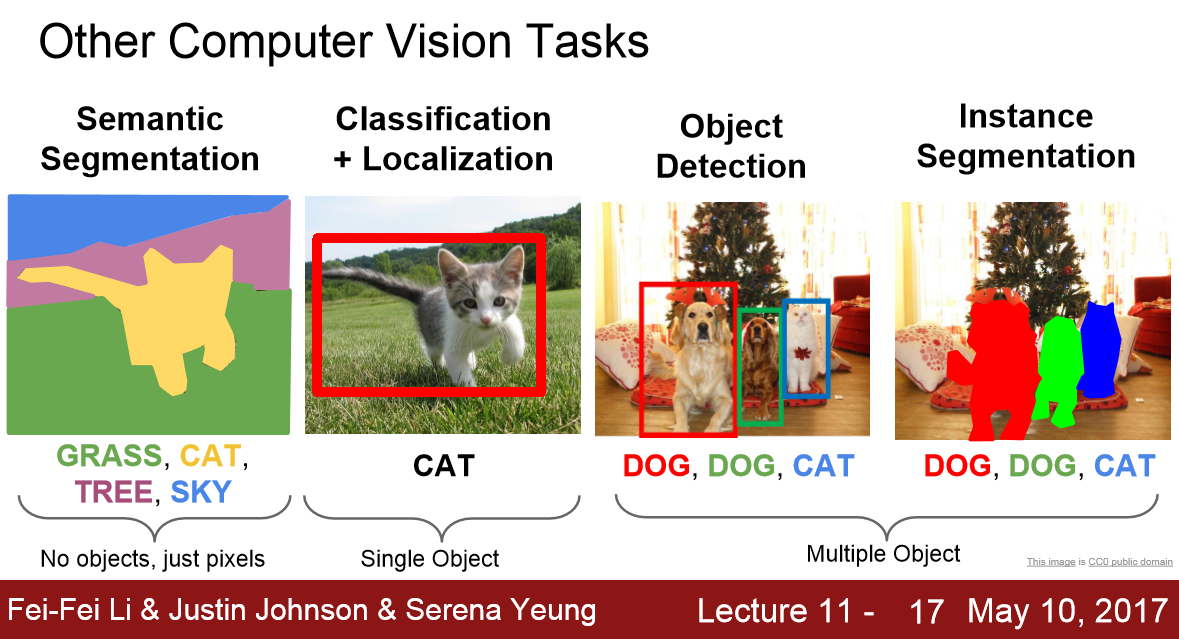

In [3]:
Image('/content/computer-vision-task.png')

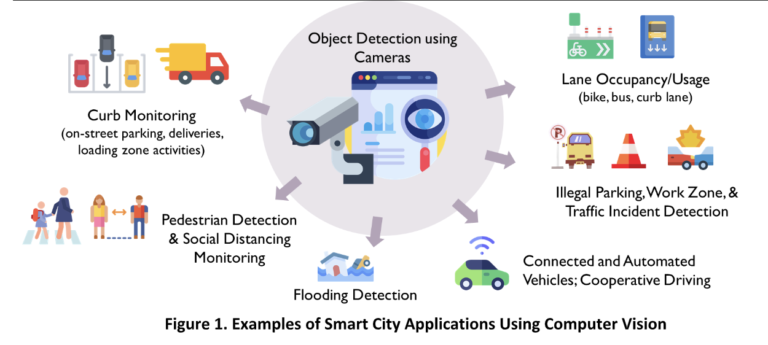

In [6]:
Image('/content/computer-vision-graphic-768x345.png')

## Reference

  
[1]I. Mihajlovic, “Everything You Ever Wanted To Know About Computer Vision.,” Towards Data Science, Dec. 13, 2024. Accessed: Jan. 01, 2025. [Online]. Available: https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e


[2]“Exploring Cost-effective Computer Vision Solutions for Smart Transportation Systems - C2SMARTER Home,” C2SMARTER Home - Connected Cities for Smart Mobility toward Accessible and Resilient Transportation. Accessed: Jan. 01, 2025. [Online]. Available: https://c2smarter.engineering.nyu.edu/exploring-cost-effective-computer-vision-solutions-for-smart-transportation-systems/
  
[3]“Stanford University CS231n: Deep Learning for Computer Vision.” Accessed: Jan. 01, 2025. [Online]. Available: https://cs231n.stanford.edu/index.html
  



todo:

- different marta station popularity -

## Hackerthon

### Datasets

[cityspace](https://www.cityscapes-dataset.com/)

[Microsoft CoCo](https://cocodataset.org/#home)

### Models

[Try YoLo v5](https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=wbvMlHd_QwMG)

[Try YoLo v8](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=FDbMt_M6PiXb)

